<a href="https://colab.research.google.com/github/PPythnoni/nlp/blob/master/unsupervised_vader_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import nltk
nltk.download('vader_lexicon')
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [95]:
data = pd.read_csv("/content/tripadvisor_hotel_reviews.csv")
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [96]:
data.shape

(20491, 2)

In [97]:
data["Rating"].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

In [98]:
data.isnull().sum()

Review    0
Rating    0
dtype: int64

In [99]:
#blanks?
blanks = []

for ind,rev,lb in data.itertuples(): 
    if type(rev)==str:            
        if rev.isspace():         
            blanks.append(ind)     
blanks

[]

In [100]:
#elimitate 65% of 5s and 4s at random for balance
data1 = data.drop(data.query('Rating == 5').sample(frac=.65).index)

In [101]:
data1["Rating"].value_counts()

4    6039
5    3169
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

In [102]:
data_b = data1.drop(data1.query('Rating == 4').sample(frac=.65).index)

In [103]:
data_b["Rating"].value_counts()

5    3169
3    2184
4    2114
2    1793
1    1421
Name: Rating, dtype: int64

In [104]:
#mapping 
mapper = {1:"neg",2:"neg",3:"neg",4:"pos",5:"pos"}
data_b["Rating"] = data_b["Rating"].map(mapper)

In [105]:
data_b.head()

,Review,Rating
1,ok nothing special charge diamond member hilto...,neg
2,nice rooms not 4* experience hotel monaco seat...,neg
3,"unique, great stay, wonderful time hotel monac...",pos
4,"great stay great stay, went seahawk game aweso...",pos
10,"poor value stayed monaco seattle july, nice ho...",neg


In [106]:
data_b["Rating"].value_counts()

neg    5398
pos    5283
Name: Rating, dtype: int64

In [108]:
sid = SentimentIntensityAnalyzer()

In [110]:
data_b['scores'] = data_b['Review'].apply(lambda review: sid.polarity_scores(review))

data_b['compound'] = data_b['scores'].apply(lambda score_dict: score_dict['compound'])

data_b['comp_score'] = data_b['compound'].apply(lambda c: 'pos' if c >=0.8 else 'neg')

In [111]:
data_b.head()

,Review,Rating,scores,compound,comp_score
1,ok nothing special charge diamond member hilto...,neg,"{'neg': 0.11, 'neu': 0.701, 'pos': 0.189, 'com...",0.9787,pos
2,nice rooms not 4* experience hotel monaco seat...,neg,"{'neg': 0.081, 'neu': 0.7, 'pos': 0.219, 'comp...",0.9889,pos
3,"unique, great stay, wonderful time hotel monac...",pos,"{'neg': 0.06, 'neu': 0.555, 'pos': 0.385, 'com...",0.9912,pos
4,"great stay great stay, went seahawk game aweso...",pos,"{'neg': 0.135, 'neu': 0.643, 'pos': 0.221, 'co...",0.9797,pos
10,"poor value stayed monaco seattle july, nice ho...",neg,"{'neg': 0.08, 'neu': 0.524, 'pos': 0.395, 'com...",0.9666,pos


In [112]:
accuracy_score(data_b['Rating'],data_b['comp_score'])

0.7157569515962925

In [113]:
print(classification_report(data_b['Rating'],data_b['comp_score']))

              precision    recall  f1-score   support

         neg       0.91      0.48      0.63      5398
         pos       0.64      0.95      0.77      5283

    accuracy                           0.72     10681
   macro avg       0.78      0.72      0.70     10681
weighted avg       0.78      0.72      0.70     10681



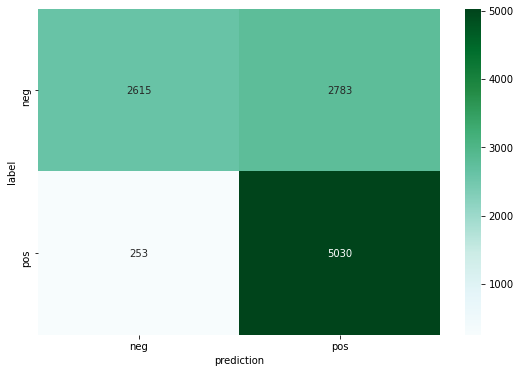

In [117]:
import seaborn as sn
classes = ["neg","pos"]
arr = confusion_matrix(data_b['Rating'],data_b['comp_score'])
df_cm = pd.DataFrame(arr, classes, classes)
plt.figure(figsize = (9,6))
sn.heatmap(df_cm, annot=True, fmt="d", cmap='BuGn')
plt.xlabel("prediction")
plt.ylabel("label")
plt.show();

In [121]:
#where it got confused
confusing_reviews = data_b[(data_b['Rating'] == "neg") & (data_b['comp_score'] == "pos") ]
pd.set_option('display.max_colwidth', 0)
confusing_reviews

,Review,Rating,scores,compound,comp_score
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty did not reply solution, send email trip guest survey did not follow email mail, guess tell concerned guest.the staff ranged indifferent not helpful, asked desk good breakfast spots neighborhood hood told no hotels, gee best breakfast spots seattle 1/2 block away convenient hotel does not know exist, arrived late night 11 pm inside run bellman busy chating cell phone help bags.prior arrival emailed hotel inform 20th anniversary half really picky wanted make sure good, got nice email saying like deliver bottle champagne chocolate covered strawberries room arrival celebrate, told needed foam pillows, arrival no champagne strawberries no foam pillows great room view alley high rise building good not better housekeeping staff cleaner room property, impressed left morning shopping room got short trips 2 hours, beds comfortable.not good ac-heat control 4 x 4 inch screen bring green shine directly eyes night, light sensitive tape controls.this not 4 start hotel clean business hotel super high rates, better chain hotels seattle,",neg,"{'neg': 0.11, 'neu': 0.701, 'pos': 0.189, 'compound': 0.9787}",0.9787,pos
2,"nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized, missed 3 separate wakeup calls, concierge busy hard touch, did n't provide guidance special requests.tv hard use ipod sound dock suite non functioning. decided book mediterranean suite 3 night weekend stay 1st choice rest party filled, comparison w spent 45 night larger square footage room great soaking tub whirlpool jets nice shower.before stay hotel arrange car service price 53 tip reasonable driver waiting arrival.checkin easy downside room picked 2 person jacuzi tub no bath accessories salts bubble bath did n't stay, night got 12/1a checked voucher bottle champagne nice gesture fish waiting room, impression room huge open space felt room big, tv far away bed chore change channel, ipod dock broken disappointing.in morning way asked desk check thermostat said 65f 74 2 degrees warm try cover face night bright blue light kept, got room night no, 1st drop desk, called maintainence came look thermostat told play settings happy digital box wo n't work, asked wakeup 10am morning did n't happen, called later 6pm nap wakeup forgot, 10am wakeup morning yep forgotten.the bathroom facilities great room surprised room sold whirlpool bath tub n't bath amenities, great relax water jets going,",neg,"{'neg': 0.081, 'neu': 0.7, 'pos': 0.219, 'compound': 0.9889}",0.9889,pos
10,"poor value stayed monaco seattle july, nice hotel priced 100- 150 night not, hotel takes beating quotient, experience simply average, nothing exceptional paying 300+ n't ca n't terribly disappointed, wife stayed nicest suites 200/night felt like overpaying, best advice shop, quality-wise league average marriott nice best western,",neg,"{'neg': 0.08, 'neu': 0.524, 'pos': 0.395, 'compound': 0.9666}",0.9666,pos
15,"horrible customer service hotel stay february 3rd 4th 2007my friend picked hotel monaco appealing website online package included champagne late checkout 3 free valet gift spa weekend, friend checked room hours earlier came later, pulled valet young man just 